### Classification 

Previously, we learned how to use input and output data to find a model that can help us to predict the output data for additional inputs. This methodology is called **Regression**.

In practice, this looks something like the following: 
<div style="text-align:center">
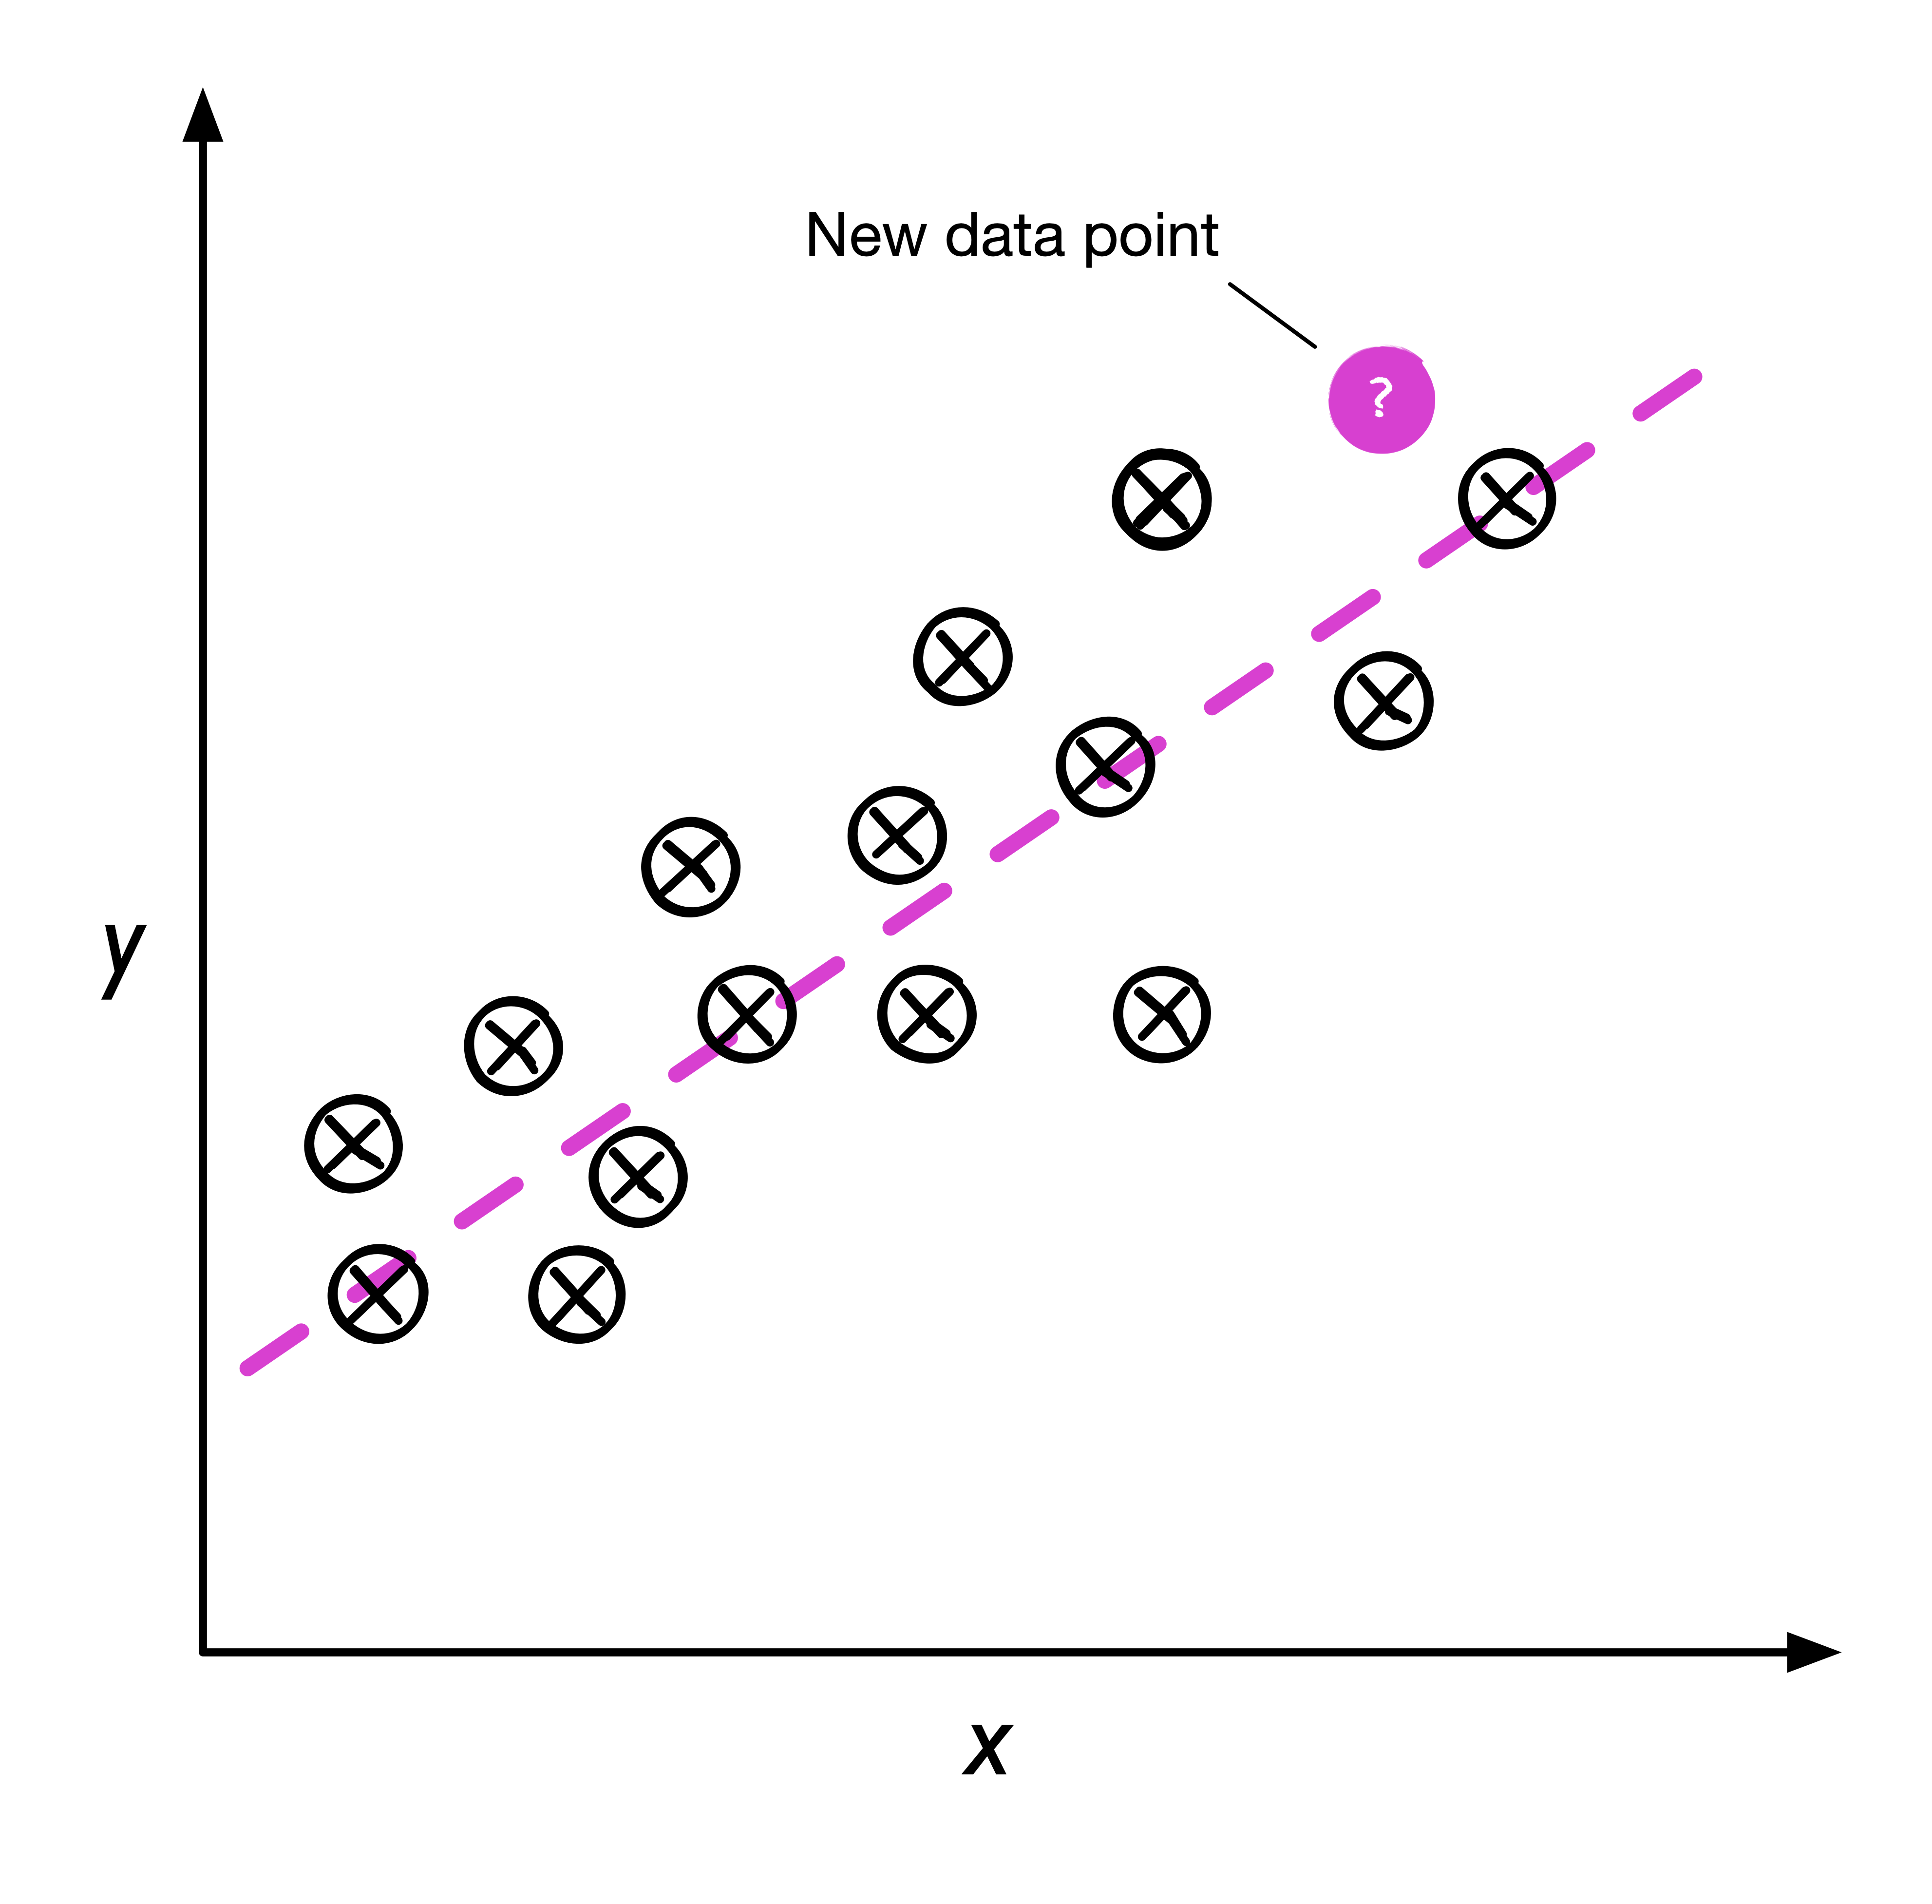
</div>

Where you use the recorded data (crosses), to find the parameters of a candidate model that will help you to predict the output ($y$) when new data ($x$) arrives. 

A similar problem to regression is that of **Classification**, in this case, there are multiple input variables (features) and an associated label (output or classes). The objective of classification is to use the the data to train a model that will help us to identify the correct label when a new set of features is provided
<div style="text-align:center">
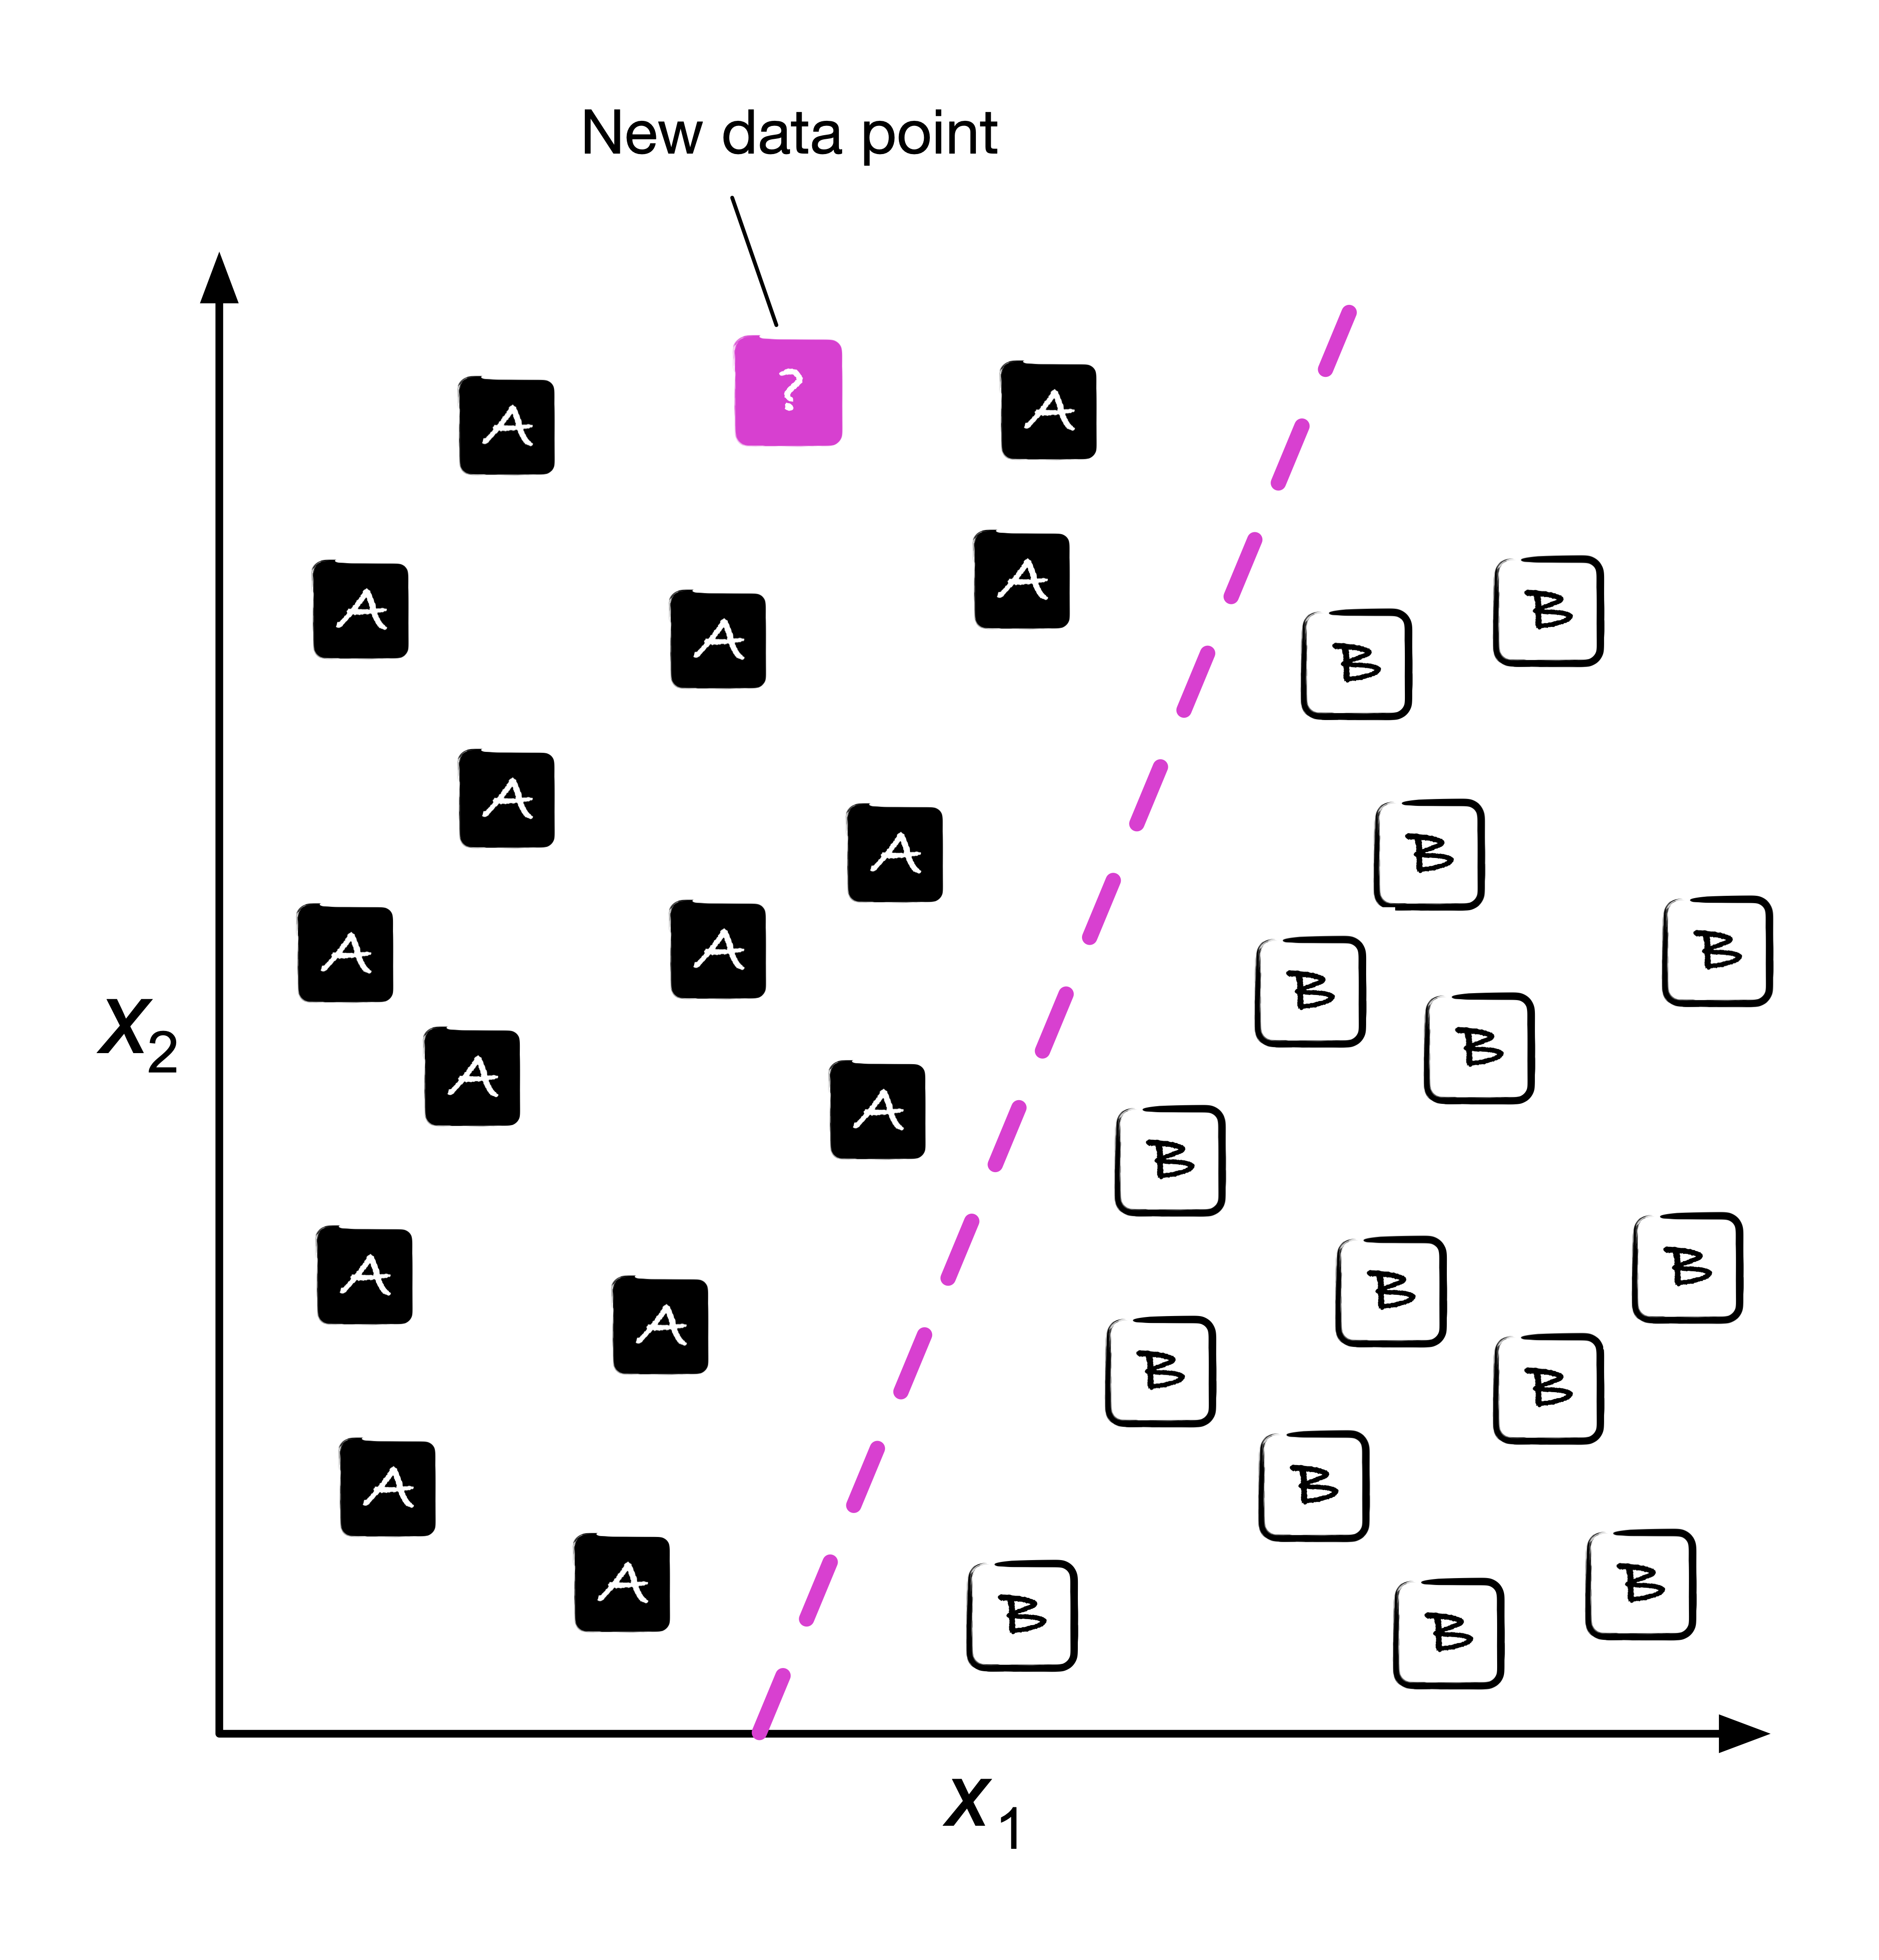
</div>

Classification can be broadly divided in two classes:
- Linear Classification : The boundary between classes is a line
- Non-Linear Classification : The bounday between classess is not a line
<div style="text-align:center">
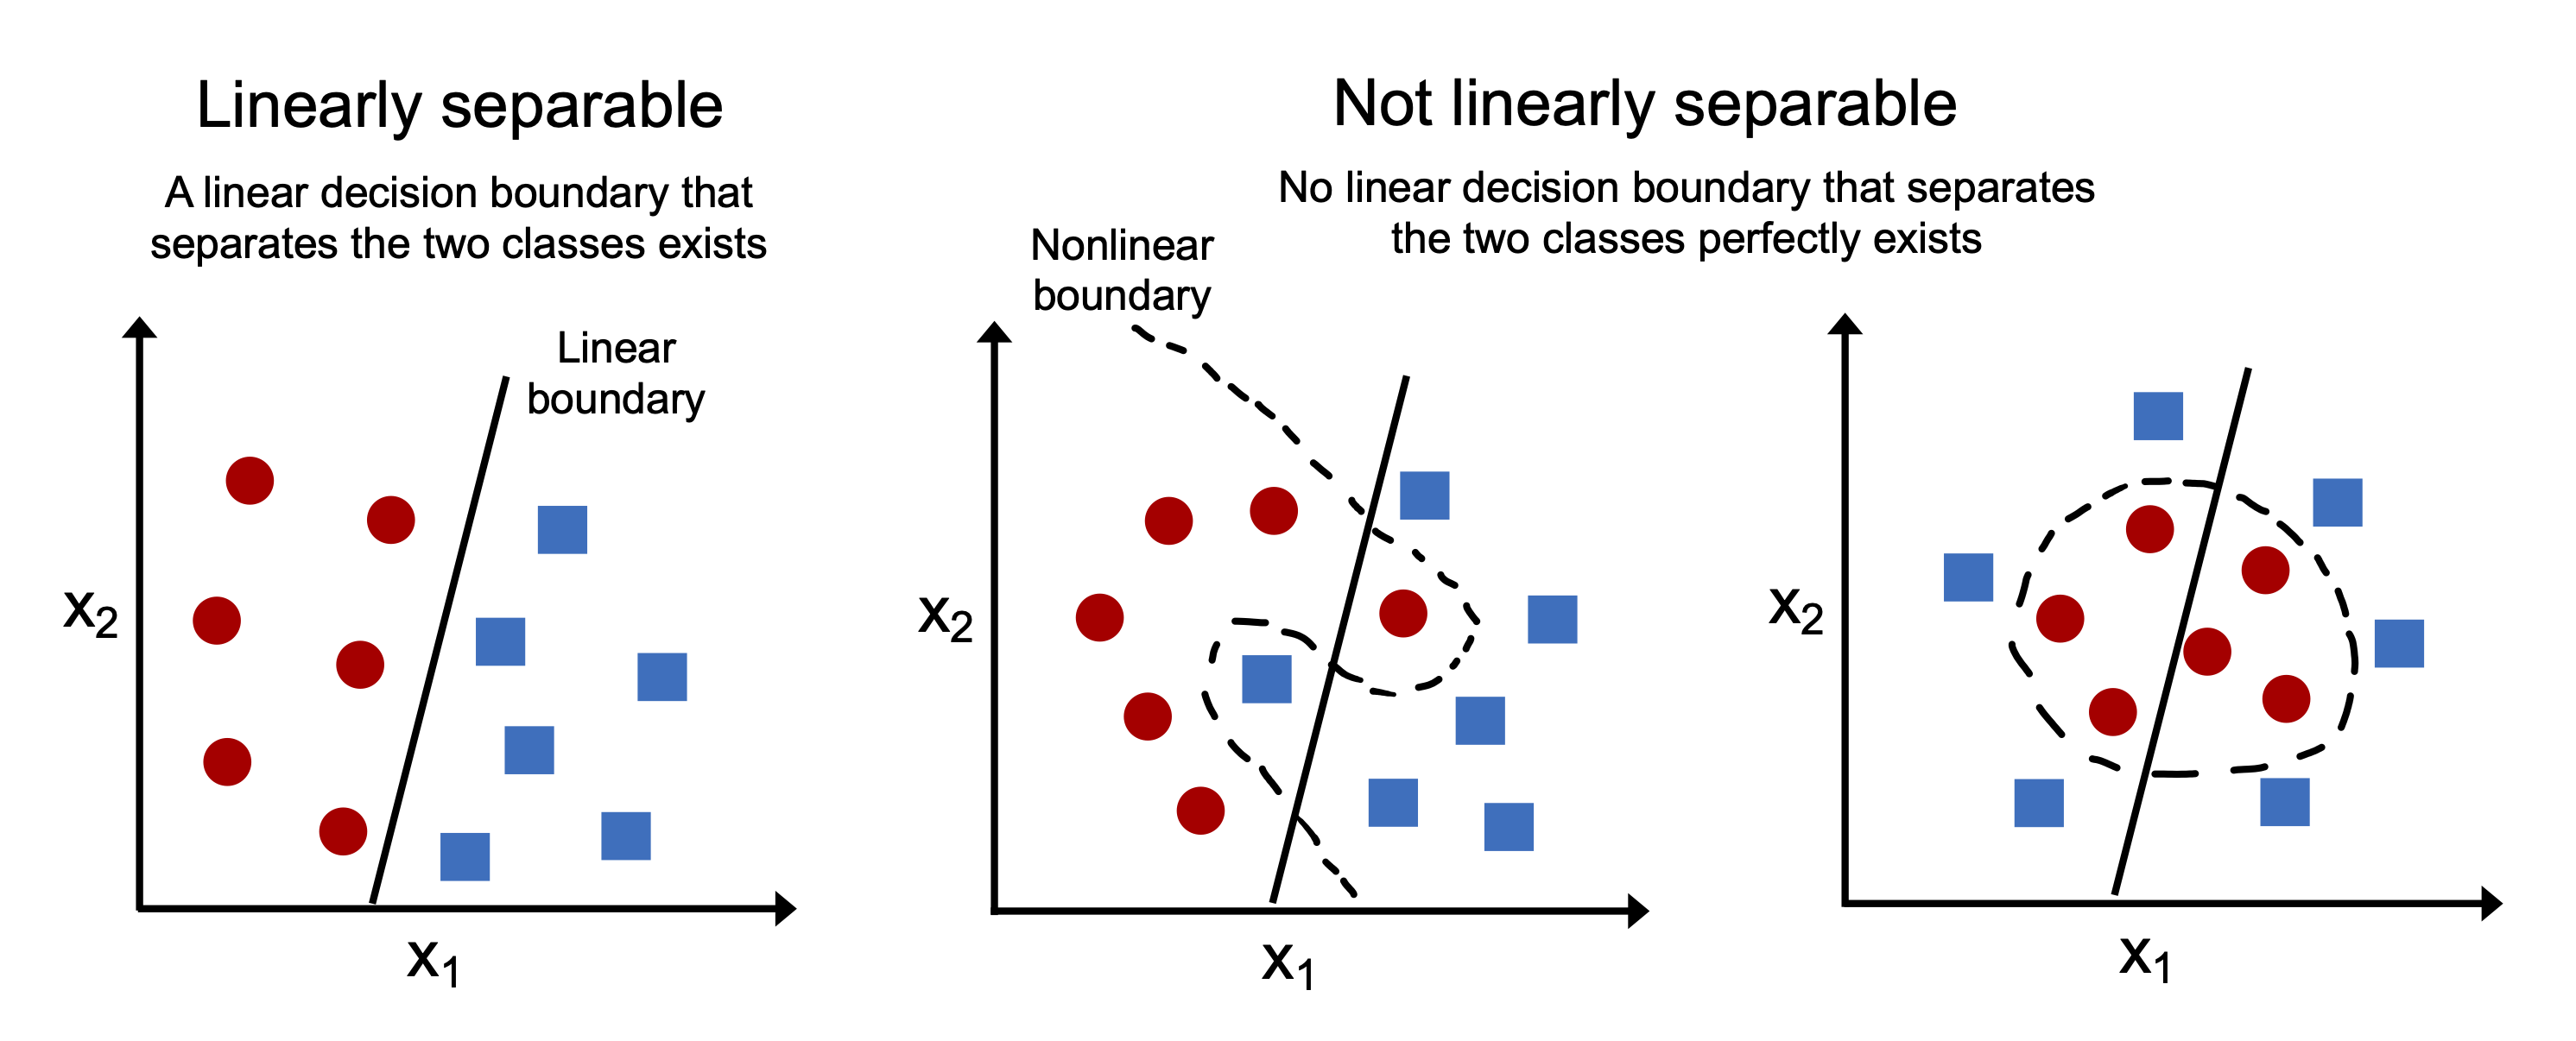
</div>


#### Linear Classification

The objective of linear classification is to find the best line that separates the classess using the avaliable data. However, the goal is not to predict a number (as in regression), but a class (that is, if the features are from class A or B). 

This task can be achieved by exploting the concept of probability. That is, in a two-class problem, we can predict the probability that a set of features belong to class A. By default, we are also estimating the probability that a set of feautures belong to class B (as 1 - probability of belonging to class A). 

For this, we can transform the output of the liner regression model by the sigmoid function ($\sigma(t)$), which will ensure that the output is always between 0 and 1 
<div style="text-align:center">
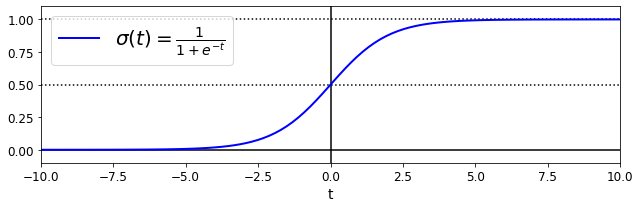
</div>


Thus, the candidate model for linear classification becomes 
$$
\hat{y} = \sigma(X\boldsymbol{\omega})
$$

Where $X$ and $\boldsymbol{\omega}$ are the same as we used in linear regression.


##### Cost function

The output of the linear classification model will be number between 0 and 1 (probabilities) for each input. So using the RMSE doesn't make much sense. 

A better alternative is a **logaritmic loss**, that has the following form :
$$
L(\boldsymbol{\omega}) = -\frac{1}{m}\sum_{i=1}^{m}\left[y[i]\log(\hat{y}[i]) + (1-y[i])\log(1-\hat{y}[i])\right]
$$

Let us diggest what this formula implies. 
- Case 1: $y[i] = 1$ and $\hat{y}[i] \approx 1$ (Correct Classification)
    $$
    \begin{align}
        &y[i] = 1 \\
        &(1-y[i]) = 0 \\
        &\log(\hat{y}[i]) \approx 0 \\
        &\log(1 - \hat{y}[i]) \rightarrow \inf \\
    \end{align}
    $$
    
    $$
    L(\boldsymbol{\omega}) \approx 0 
    $$
    
- Case 2: $y[i] = 0$ and $\hat{y}[i] \approx 0$ (Correct Classification)
    $$
    \begin{align}
        &y[i] = 0 \\
        &(1-y[i]) = 1 \\
        &\log(\hat{y}[i]) \rightarrow \inf \\
        &\log(1 - \hat{y}[i]) \approx 0 \\
    \end{align}
    $$
    
    $$
    L(\boldsymbol{\omega}) \approx 0 
    $$
    
- Case 3: $y[i] = 1$ and $\hat{y}[i] < 1$ (Incorrect Classification)

    $$
    \begin{align}
        &y[i] = 1 \\
        &(1-y[i]) = 0 \\
        &\log(\hat{y}[i]) < 0 \ \text{becomes closer to 0 as it gets closer to 1}  \\
        &\log(1 - \hat{y}[i]) < 0 \\
    \end{align}
    $$
    
    $$
    L(\boldsymbol{\omega}) > 0  
    $$
    
- Case 4: $y[i] = 0$ and $\hat{y}[i] > 0$ (Incorrect Classification)

    $$
    \begin{align}
        &y[i] = 0 \\
        &(1-y[i]) = 1 \\
        &\log(\hat{y}[i]) < 0 \ \text{becomes closer to 0 as it gets closer to 1}  \\
        &\log(1 - \hat{y}[i]) < 0 \text{becomes closer to 0 as it gets closer to 0} \\
    \end{align}
    $$
    
    $$
    L(\boldsymbol{\omega}) > 0  
    $$
    
So, the **logaritmic loss** is non-zero when the prediction model generates probability that does not agree with the training data. 

## Example 

Flower classificaiton 

<div style="text-align:center">
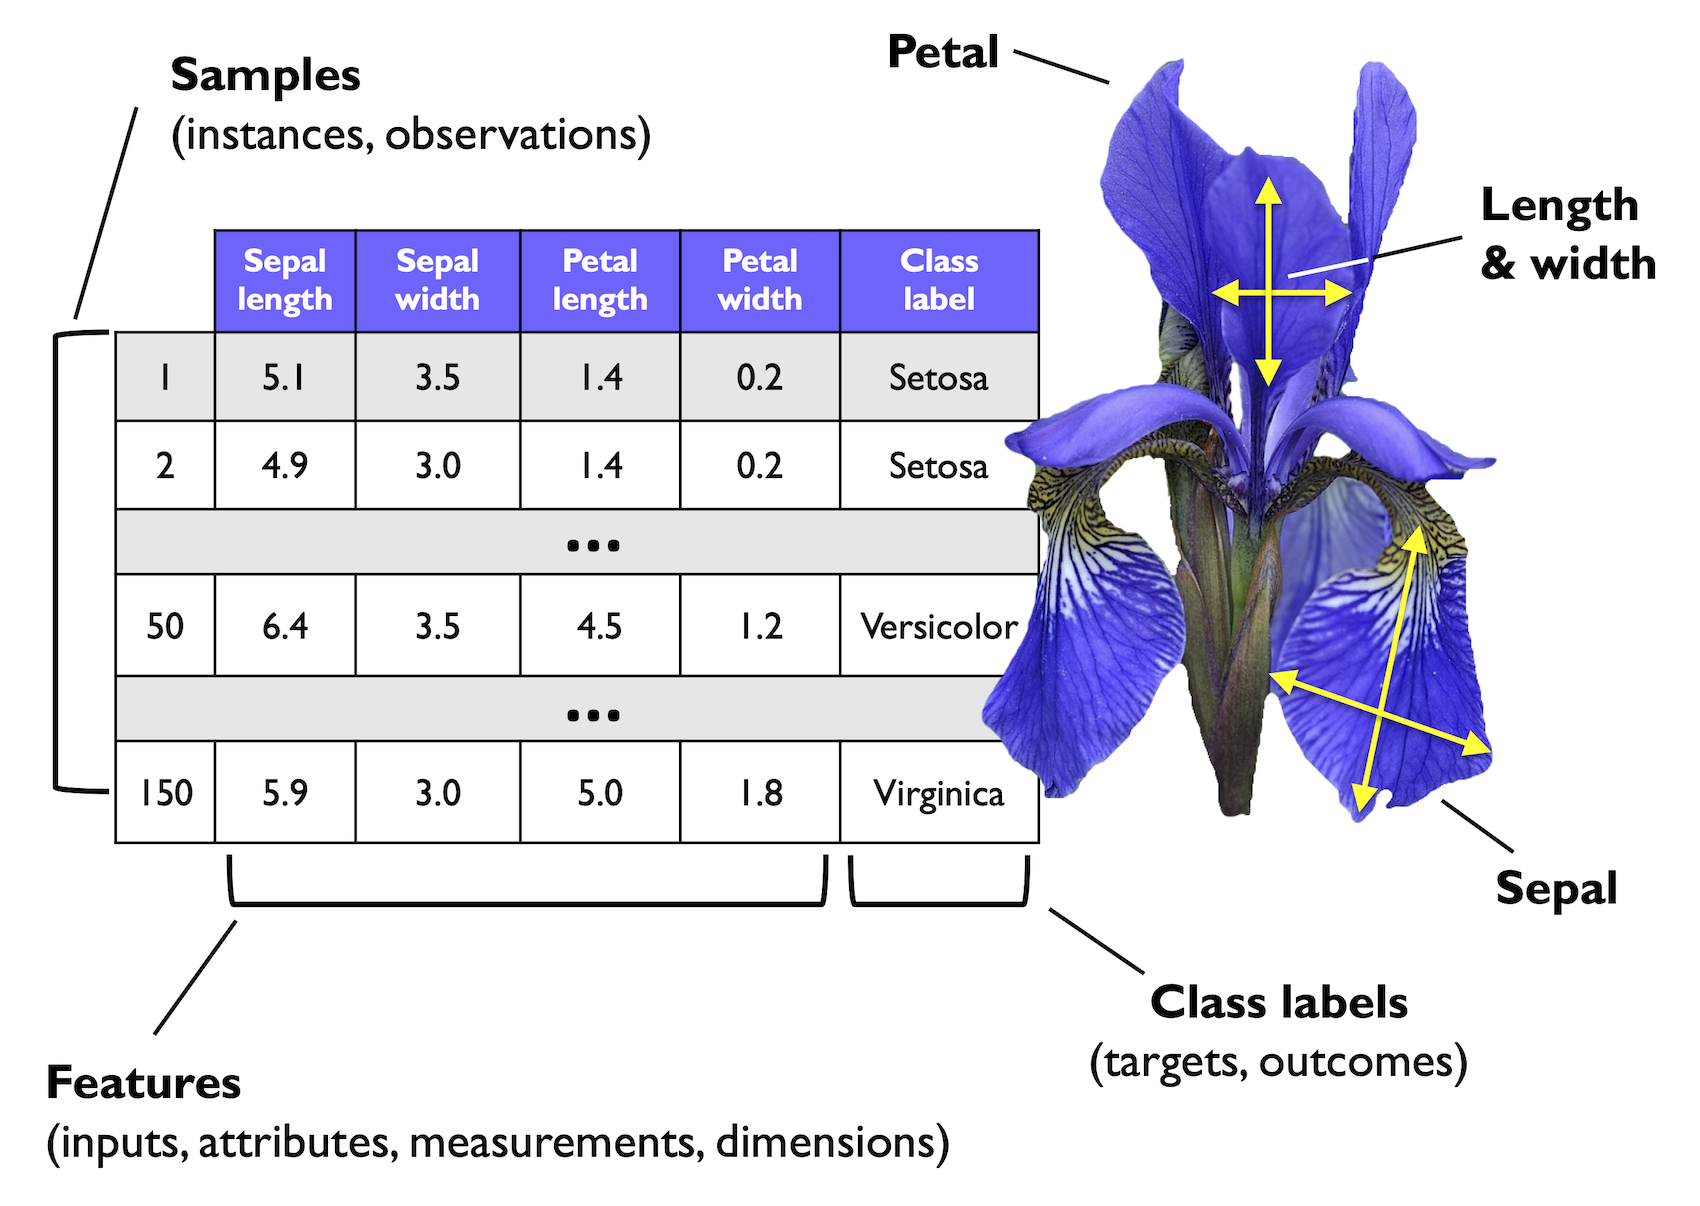
</div>


This dataset contains information (features) about different types of flowers. The objective is to use those features to identify the type of flower. 

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

#load data
iris = datasets.load_iris()
X = iris['data']

pd.DataFrame(np.column_stack((['Sepal lenght', 'Sepal Width','Petal lenght', 'Petal Width'],X.mean(axis=0),X.std(axis=0))), columns = ['Feature', 'Mean', 'Std'])

,Feature,Mean,Std
0,Sepal lenght,5.843333333333335,0.8253012917851409
1,Sepal Width,3.057333333333334,0.43441096773549437
2,Petal lenght,3.7580000000000027,1.7594040657753032
3,Petal Width,1.199333333333334,0.7596926279021594


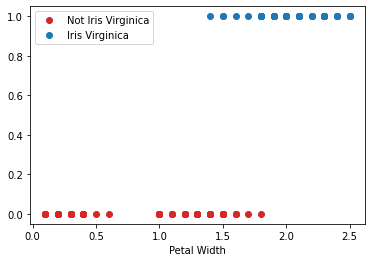

In [7]:
#we can use a single feature to understand how everything works
X = iris['data'][:,3:] #only one feature
y = (iris['target'] == 2).astype(int)

# We can try with a single feature for simplicity 
plt.plot(X[y==0],y[y==0],'o', color='tab:red', label='Not Iris Virginica')
plt.plot(X[y==1],y[y==1],'o', color='tab:blue', label='Iris Virginica')
plt.xlabel('Petal Width')
plt.legend()
plt.show()

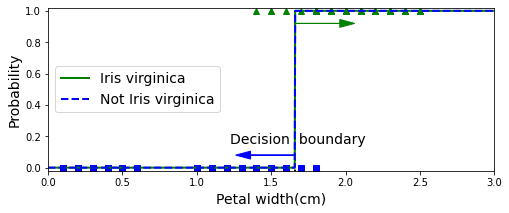

In [8]:
from sklearn.linear_model import LogisticRegression

#fit the model
log_reg = LogisticRegression()
log_reg.fit(X,y)

#now you can use the model to predict the output for any new petal lenght measurements 
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba= log_reg.predict(X_new)
decision_boundary = X_new[y_proba >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba, "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba, "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary[0]+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width(cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show();

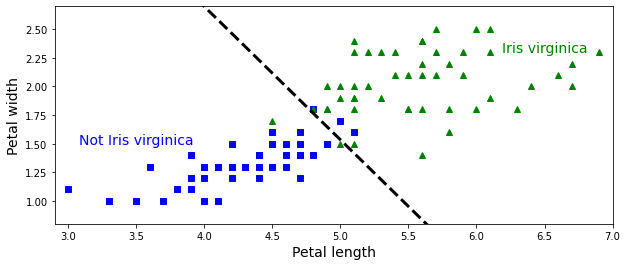

In [13]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression()
log_reg.fit(X, y)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()


### How is a classification made?



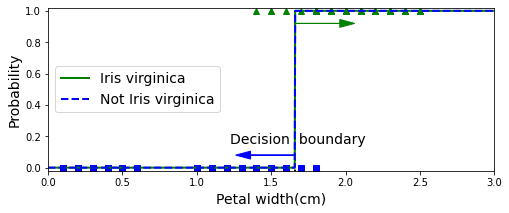

In [9]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

#load data
iris = datasets.load_iris()
X = iris['data'][:,3:] #only one feature
y = (iris['target'] == 2).astype(int)



#fit the model
log_reg = LogisticRegression()
log_reg.fit(X,y);
#now you can use the model to predict the output for any new petal lenght measurements 
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba= log_reg.predict(X_new)
decision_boundary = X_new[y_proba >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba, "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba, "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary[0]+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width(cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show();

In logistic regression, the classification depends on a linear model. To see the output of the linear model we can use the function *decision_function*. 

The *decision_function* simply evaluates the estimated linear model witht the new input without computing the probability

Let us see what happens with different inputs 

In [11]:
Coefficient = log_reg.coef_[0]
Intercept = log_reg.intercept_[0]
Coefficient, Intercept

(array([4.3330846]), -7.194708301503786)

In [15]:
inn = 0.1
output_linear_model = Coefficient[0]*inn + Intercept
output_linear_model

-6.761399841845208

In [16]:
#output of sigmoid
1/(1+np.exp(-output_linear_model))

0.001156269065831438

In [17]:
#probability of class 1:
(1/(1+np.exp(-output_linear_model)))*100

0.11562690658314381

In [18]:
#prob of class 0
(1- (1/(1+np.exp(-output_linear_model))) )*100

99.88437309341685

In [19]:
## inn refers to the petal width
inn = 0.1
output_linear_model = Coefficient[0]*inn + Intercept
probability = 1/(1+np.exp(-output_linear_model))
predicted_class = 0 if probability<=0.5 else 1
print(f'Output Linear Model = {output_linear_model} \nProbability of class 0 = {(1-probability)*100}% \nProbability of class 1 = {probability*100}% \nPredicted class = {predicted_class} ')

Output Linear Model = -6.761399841845208 
Probability of class 0 = 99.88437309341685% 
Probability of class 1 = 0.11562690658314381% 
Predicted class = 0 


In [20]:
## inn refers to the petal width
inn = 3
output_linear_model = Coefficient[0]*inn + Intercept
probability = 1/(1+np.exp(-output_linear_model))
predicted_class = 0 if probability<=0.5 else 1
print(f'Output Linear Model = {output_linear_model} \nProbability of class 0 = {(1-probability)*100}% \nProbability of class 1 = {probability*100}% \nPredicted class = {predicted_class} ')

Output Linear Model = 5.804545488253547 
Probability of class 0 = 0.3004768416413728% 
Probability of class 1 = 99.69952315835863% 
Predicted class = 1 


In [21]:
## inn refers to the petal width
inn = 1.0
output_linear_model = Coefficient[0]*inn + Intercept
probability = 1/(1+np.exp(-output_linear_model))
predicted_class = 0 if probability<=0.5 else 1
print(f'Output Linear Model = {output_linear_model} \nProbability of class 0 = {(1-probability)*100}% \nProbability of class 1 = {probability*100}% \nPredicted class = {predicted_class} ')

Output Linear Model = -2.861623704918008 
Probability of class 0 = 94.59164260617366% 
Probability of class 1 = 5.408357393826333% 
Predicted class = 0 


In [22]:
## inn refers to the petal width
inn = 1.5
output_linear_model = Coefficient[0]*inn + Intercept
probability = 1/(1+np.exp(-output_linear_model))
predicted_class = 0 if probability<=0.5 else 1
print(f'Output Linear Model = {output_linear_model} \nProbability of class 0 = {(1-probability)*100}% \nProbability of class 1 = {probability*100}% \nPredicted class = {predicted_class} ')

Output Linear Model = -0.6950814066251194 
Probability of class 0 = 66.70963560277922% 
Probability of class 1 = 33.290364397220785% 
Predicted class = 0 


In [23]:
## inn refers to the petal width
inn = 1.67
output_linear_model = Coefficient[0]*inn + Intercept
probability = 1/(1+np.exp(-output_linear_model))
predicted_class = 0 if probability<=0.5 else 1
print(f'Output Linear Model = {output_linear_model} \nProbability of class 0 = {(1-probability)*100}% \nProbability of class 1 = {probability*100}% \nPredicted class = {predicted_class} ')

Output Linear Model = 0.04154297479446267 
Probability of class 0 = 48.96157497029223% 
Probability of class 1 = 51.03842502970777% 
Predicted class = 1 


### Multiclass Classification

Logaritmic classification can be naturally extended to more than two classess. The loss function can be expressed as

$$
L(\boldsymbol \omega) = -\frac{1}{N}\sum_{k}\sum_{i}y_{k}[i]\log(\hat{y}_{k}[i])
$$

Where $k$ are the number of classes, $N$ the number of samples, $y_{k}[i]$ is the target, $\hat{y}_{k}[i]$ is the predicted probability, and $\boldsymbol \omega$ are the model parameters. 

Note that when $y_{k}[i]$ is 1 (or 0) and  $\hat{y}_{k}[i]$ is close to 1 (or 0), the loss is close to zero. However, when $y_{k}[i]$ is 1 (or 0) and $\hat{y}_{k}[i]$ is close to 0 (or 1), the loss function is large. 

In the multiclass problem, the probability has to be computed with a modified formula
$$
\hat{y}_{k}[i] = \sigma(X\boldsymbol{\omega_{k}}) = \frac{\exp(X\boldsymbol{\omega_{k}})}{\sum_{j=1}^{K}\exp(X\boldsymbol{\omega_{j}})}
$$

where each class $j$ has its own set of parameters $\boldsymbol{\omega_{j}}$

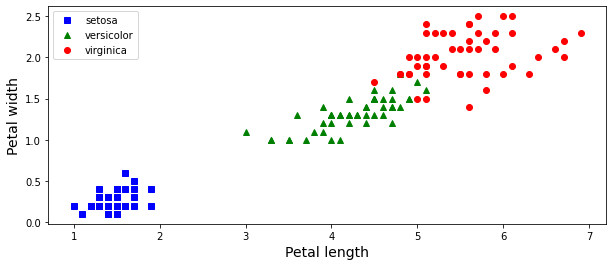

In [35]:
#Example

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


#load data
iris = datasets.load_iris()
X = iris['data'][:,2:] #only two features
y = (iris['target']).astype(int)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label = 'setosa')
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label='versicolor')
plt.plot(X[y==2, 0], X[y==2, 1], "ro", label = 'virginica')
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend()
plt.show();

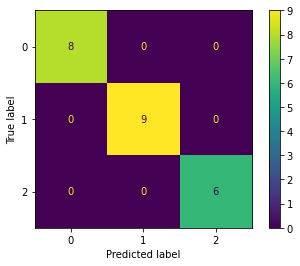

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,random_state=random_seed)

log_reg = LogisticRegression();
log_reg.fit(X_train,y_train);



ConfusionMatrixDisplay.from_estimator(log_reg, X_test,y_test)
plt.show();


In [31]:
x1 = 1.5
x2 = 0.5 

model_output_class_0 = (log_reg.intercept_[0] + log_reg.coef_[0].reshape(1,-1) @ np.array([[x1],[x2]]))[0][0]
model_output_class_1 = (log_reg.intercept_[1] + log_reg.coef_[1].reshape(1,-1) @ np.array([[x1],[x2]]))[0][0]
model_output_class_2 = (log_reg.intercept_[2] + log_reg.coef_[2].reshape(1,-1) @ np.array([[x1],[x2]]))[0][0]

prob_class_0 = np.exp(model_output_class_0)/(np.exp(model_output_class_0)+ np.exp(model_output_class_1)+np.exp(model_output_class_2))
prob_class_1 = np.exp(model_output_class_1)/(np.exp(model_output_class_0)+ np.exp(model_output_class_1)+np.exp(model_output_class_2))
prob_class_2 = np.exp(model_output_class_2)/(np.exp(model_output_class_0)+ np.exp(model_output_class_1)+np.exp(model_output_class_2))

print(f'Probablity of class 0 : {prob_class_0*100} % \nProbablity of class 1 : {prob_class_1*100} % \nProbablity of class 2 : {prob_class_2*100} %')

Probablity of class 0 : 96.6006966524799 % 
Probablity of class 1 : 3.3992674476048257 % 
Probablity of class 2 : 3.589991527394908e-05 %


In [32]:
x1 = 4.0
x2 = 1.5 

model_output_class_0 = (log_reg.intercept_[0] + log_reg.coef_[0].reshape(1,-1) @ np.array([[x1],[x2]]))[0][0]
model_output_class_1 = (log_reg.intercept_[1] + log_reg.coef_[1].reshape(1,-1) @ np.array([[x1],[x2]]))[0][0]
model_output_class_2 = (log_reg.intercept_[2] + log_reg.coef_[2].reshape(1,-1) @ np.array([[x1],[x2]]))[0][0]

prob_class_0 = np.exp(model_output_class_0)/(np.exp(model_output_class_0)+ np.exp(model_output_class_1)+np.exp(model_output_class_2))
prob_class_1 = np.exp(model_output_class_1)/(np.exp(model_output_class_0)+ np.exp(model_output_class_1)+np.exp(model_output_class_2))
prob_class_2 = np.exp(model_output_class_2)/(np.exp(model_output_class_0)+ np.exp(model_output_class_1)+np.exp(model_output_class_2))

print(f'Probablity of class 0 : {prob_class_0*100} % \nProbablity of class 1 : {prob_class_1*100} % \nProbablity of class 2 : {prob_class_2*100} %')

Probablity of class 0 : 2.2411686753596594 % 
Probablity of class 1 : 90.87193246624506 % 
Probablity of class 2 : 6.886898858395282 %


In [33]:
x1 = 6.5
x2 = 2.5 

model_output_class_0 = (log_reg.intercept_[0] + log_reg.coef_[0].reshape(1,-1) @ np.array([[x1],[x2]]))[0][0]
model_output_class_1 = (log_reg.intercept_[1] + log_reg.coef_[1].reshape(1,-1) @ np.array([[x1],[x2]]))[0][0]
model_output_class_2 = (log_reg.intercept_[2] + log_reg.coef_[2].reshape(1,-1) @ np.array([[x1],[x2]]))[0][0]

prob_class_0 = np.exp(model_output_class_0)/(np.exp(model_output_class_0)+ np.exp(model_output_class_1)+np.exp(model_output_class_2))
prob_class_1 = np.exp(model_output_class_1)/(np.exp(model_output_class_0)+ np.exp(model_output_class_1)+np.exp(model_output_class_2))
prob_class_2 = np.exp(model_output_class_2)/(np.exp(model_output_class_0)+ np.exp(model_output_class_1)+np.exp(model_output_class_2))

print(f'Probablity of class 0 : {prob_class_0*100} % \nProbablity of class 1 : {prob_class_1*100} % \nProbablity of class 2 : {prob_class_2*100} %')

Probablity of class 0 : 3.928411779076836e-06 % 
Probablity of class 1 : 0.18353646710921004 % 
Probablity of class 2 : 99.81645960447902 %


In [34]:
x1 = 5.0
x2 = 1.5 

model_output_class_0 = (log_reg.intercept_[0] + log_reg.coef_[0].reshape(1,-1) @ np.array([[x1],[x2]]))[0][0]
model_output_class_1 = (log_reg.intercept_[1] + log_reg.coef_[1].reshape(1,-1) @ np.array([[x1],[x2]]))[0][0]
model_output_class_2 = (log_reg.intercept_[2] + log_reg.coef_[2].reshape(1,-1) @ np.array([[x1],[x2]]))[0][0]

prob_class_0 = np.exp(model_output_class_0)/(np.exp(model_output_class_0)+ np.exp(model_output_class_1)+np.exp(model_output_class_2))
prob_class_1 = np.exp(model_output_class_1)/(np.exp(model_output_class_0)+ np.exp(model_output_class_1)+np.exp(model_output_class_2))
prob_class_2 = np.exp(model_output_class_2)/(np.exp(model_output_class_0)+ np.exp(model_output_class_1)+np.exp(model_output_class_2))

print(f'Probablity of class 0 : {prob_class_0*100} % \nProbablity of class 1 : {prob_class_1*100} % \nProbablity of class 2 : {prob_class_2*100} %')

Probablity of class 0 : 0.08755511709419918 % 
Probablity of class 1 : 52.027911657006285 % 
Probablity of class 2 : 47.88453322589952 %
